## Bachelor Thesis - Informatik

### Variante 2 :
### Multiclass-Klassifizierung von Greyscale-Bildern mit 2D Convolutional Neuronal Network

<div align="left">
<h2><img src="https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExZ2hrOGtveWx0ZGxsaGFsYXNzbjVhOTNyaTg2cG44anZ5eWd5a3ZyMyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/l3vRcrVqhBVSpJte0/giphy.gif" width="200" alt="Data"></h2>
</div>

Dieser Ansatz verwendet als Datengrundlage die folgenden drei Datensätze :

###### ☑️ Die Daten wurden von einem Myo-Armband per Bluetooth LE an einen ESP32S3 übertragen

###### ☑️ Sämtliche Daten wurden mit folgender Lösung [Processing-Grapher](https://github.com/chillibasket/processing-grapher.git) aufgezeichnet und als .csv-Datei gespeichert

###### ☑️ Vier Testpersonen, davon eine weibliche und drei männliche Personen standen zur Verfügung

###### ☑️ Ein Datensatz der bei Kaggle zur Verfügung steht

###### ☑️ Ein Datensatz der aus dem Ninapro DB5 Datensatz abgeleitet wurde

###### ☑️ Alle Personen haben die folgenden vier Gesten in gleicher Position ausgeführt :

<img src="./Gestenbilder/Eigene_Geste_0.png" width="150">    <img src="./Gestenbilder/Eigene_Geste_1.png" width="150">    <img src="./Gestenbilder/Eigene_Geste_2.png" width="150">      <img src="./Gestenbilder/Eigene_Geste_3.png" width="150">

##### ▶️ Installation notwendiger Python-Bibliotheken

In [297]:
#%pip install pandas
#%pip install numpy
#%pip install seaborn
#%pip install -U seaborn-image
#%pip install matplotlib.pyplot
#%pip install scikit-learn

##### ▶️ Importieren notwendiger Python-Bibliotheken

In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

from sklearn.preprocessing import MinMaxScaler, StandardScaler # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import classification_report, confusion_matrix # type: ignore

import tensorflow as tf # type: ignore

from tensorflow import keras # type: ignore
from keras import layers # type: ignore
from keras import ops # type: ignore

##### ▶️ Alternative 1 : Einlesen der eigenen Roh-Daten aus dem Quellordner<br>
****
📌 Dieses Feld ausführen bei Verwendung der Eigen-Daten !!

In [21]:
# Importiere die .csv-Dateien mit den EMG-Daten der einzelnen Probanden und den einzelnen Labels (Gesten)
# Dabei gilt folgendes Schema, siehe auch Bilder im Ordner "Gestenbilder"
# Label 0 --> Faust
# Label 1 --> Daumen hoch
# Label 2 --> Schere
# Label 3 --> Gespreizte Hand


##############################################################
# Aufnahme der Einzelgesten                                  #
# Datentyp: Python List                                      #
##############################################################
proband1 = []
proband2 = []
proband3 = []
proband4 = []

##############################################################
# Baue daraus den Dateipfad und lese Datei ein               #
# Schreibe Nummer der Geste in entsprechende Spalte          #
##############################################################

for label in ['0', '1', '2', '3']:
    proband1.append(pd.read_csv('./Eigene/P1L' + label + '.csv', sep=',', header=None))    
    proband1[int(label)][64] = int(label)

for label in ['0', '1', '2', '3']:
    proband2.append(pd.read_csv('./Eigene/P2L' + label + '.csv', sep=',', header=None))    
    proband2[int(label)][64] = int(label)

for label in ['0', '1', '2', '3']:
    proband3.append(pd.read_csv('./Eigene/P3L' + label + '.csv', sep=',', header=None))    
    proband3[int(label)][64] = int(label)

for label in ['0', '1', '2', '3']:
    proband4.append(pd.read_csv('./Eigene/P4L' + label + '.csv', sep=',', header=None))    
    proband4[int(label)][64] = int(label)


##############################################################
# Schreibe alle Sub-Dataframes in ein gesamtes Dataframe     #
# Datentyp: Pandas Dataframe                                 #
##############################################################
proband1 = pd.concat([df for df in proband1], axis=0).reset_index(drop=True)
proband2 = pd.concat([df for df in proband2], axis=0).reset_index(drop=True)
proband3 = pd.concat([df for df in proband3], axis=0).reset_index(drop=True)
proband4 = pd.concat([df for df in proband4], axis=0).reset_index(drop=True)

all_data = pd.concat([proband1, proband2, proband3, proband4])

##############################################################
# Schreibe alle Sub-Dataframes in ein gesamtes Dataframe     #
# Datentyp: Pandas Dataframe                                 #
##############################################################
#all_data = pd.concat([df for df in single_data], axis=0).reset_index(drop=True)
all_data = all_data.dropna()
all_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
1511,5.0,5.0,7.0,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0,...,2.0,2.0,3.0,-9.0,-1.0,-1.0,-3.0,6.0,15.0,3
1512,-4.0,28.0,19.0,2.0,1.0,1.0,-1.0,0.0,0.0,-7.0,...,15.0,-3.0,1.0,2.0,2.0,-2.0,1.0,-7.0,-4.0,3
1513,2.0,-19.0,-18.0,1.0,-1.0,-3.0,-1.0,18.0,1.0,12.0,...,-3.0,3.0,-6.0,-5.0,-3.0,-1.0,0.0,2.0,-3.0,3
1514,-8.0,-6.0,-35.0,-1.0,-2.0,-2.0,0.0,-27.0,-7.0,-3.0,...,2.0,-4.0,-2.0,-8.0,4.0,1.0,2.0,-5.0,-8.0,3
1515,-3.0,-1.0,-51.0,-3.0,1.0,0.0,-3.0,4.0,0.0,-9.0,...,19.0,-5.0,0.0,19.0,-4.0,-1.0,-1.0,-2.0,-44.0,3


##### ▶️ Alternative 2 : Einlesen des Datensatzes von Kaggle aus dem Quellordner

****
📌 Dieses Feld ausführen bei Verwendung der Kaggle-Daten !!

[Link zum Datensatz](https://www.kaggle.com/code/akshita72/hand-gesture-recognition-from-emg-signals/input)

In [12]:
# Importiere die .csv-Dateien mit den EMG-Daten der einzelnen Probanden und den einzelnen Labels (Gesten)
# Dabei gilt folgendes Schema:
# Label 0 --> Stein
# Label 1 --> Schere
# Label 2 --> Papier
# Label 3 --> OK-Zeichen


##############################################################
# Aufnahme der Einzelgesten                                  #
# Datentyp: Python List                                      #
##############################################################
single_data = []


##############################################################
# Baue daraus den Dateipfad und lese Datei ein               #
# Schreibe Nummer der Geste in entsprechende Spalte          #
##############################################################
for label in ['0', '1', '2', '3', ]:
    single_data.append(pd.read_csv('./Kaggle/' + label + '_long.csv', sep=',', header=None))
    #single_data.append(pd.read_csv('./Kaggle/' + label + '_short.csv', sep=';', header=None))        
    #single_data.append(pd.read_csv('./Kaggle/' + label + '_medium.csv', sep=';', header=None))        
    single_data[int(label)][64] = int(label)
    

##############################################################
# Schreibe alle Sub-Dataframes in ein gesamtes Dataframe     #
# Datentyp: Pandas Dataframe                                 #
##############################################################
all_data = pd.concat([df for df in single_data], axis=0).reset_index(drop=True)
all_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
11673,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,...,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
11674,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,...,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
11675,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,...,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
11676,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,...,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3
11677,-2.0,4.0,2.0,-4.0,12.0,3.0,-2.0,9.0,-8.0,-2.0,...,2.0,1.0,0.0,-1.0,-2.0,-30.0,64.0,11.0,5.0,3


##### ▶️ Alternative 3 : Einlesen von Daten aus dem Ninapro DB5 Datensatz<br>
****
📌 Dieses Feld ausführen bei Verwendung Ninapro-Daten !!

[Link zum Datensatz](https://ninapro.hevs.ch/instructions/DB5.html)

In [44]:
# Die Dateien im Ordner "Ninapro_DB5" enthalten Auszüge aus dem originalen Datensatz
# Aus den Matlab-Files wurden die 8 Sensorwerte und die zugehörigen Labels entnommen
# Es wurden nur die "Subjects" 01 bis 06 berücksichtigt

# Importiere die .csv-Dateien mit den EMG-Daten der einzelnen Probanden und den einzelnen Labels (Gesten)
# Dabei gilt folgendes Schema, siehe auch Bilder im Ordner "Gestenbilder"
# Label 0 --> Ruheposition
# Label 1 --> Daumen hoch
# Label 2 --> Zeige- und Mittelfinger gestreckt
# Label 3 --> Daumen, Zeige- und Mittelfinger gestreckt
# Label 4 --> Daumen gekrümmt in Richtung kleiner Finger
# Label 5 --> Alle Finger ausgestreckt
# Label 6 --> Finger zur Faust geballt

##############################################################
# Aufnahme der Einzelgesten                                  #
# Datentyp: Python List                                      #
##############################################################
single_data = []


##############################################################
# Baue daraus den Dateipfad und lese Datei ein               #
# Schreibe Nummer der Geste in entsprechende Spalte          #
##############################################################
for label in ['1', '2', '3', '4', '5', '6']:
    single_data.append(pd.read_csv('./Ninapro_DB5/P' + label + '.csv', sep=';', header=None))    
    

##############################################################
# Schreibe alle Sub-Dataframes in ein gesamtes Dataframe     #
# Datentyp: Pandas Dataframe                                 #
##############################################################
all_data = pd.concat([df for df in single_data], axis=0).reset_index(drop=True)

all_data.tail()

,0,1,2,3,4,5,6,7,8
567995,-1,1,-2,-1,-1,0,0,3,0
567996,-2,2,-2,-3,-1,-3,-3,-2,0
567997,-3,-5,-3,-1,0,0,-2,3,0
567998,-5,0,0,-2,-1,-1,0,-3,0
567999,-1,-5,0,-1,0,0,0,-1,0


##### ▶️ Ansatz 1 : Umwandlung in Greyscale-Bilder mit allen Sensorkanälen pro Bild
****

📌 Dieses Feld für Bilder mit allen Sensorwerten pro Bild ausführen --> **unbedingt die richtige Label-Struktur einkommentieren !!**

****
☑️ Erzeugte Strukturen aus den Eigen-Daten haben das Format 16 x 8<br>
☑️ Erzeugte Strukturen aus den Kaggle-Daten haben das Format 16 x 64<br>
****
<br>
📌 Jede Struktur enthält alle 8 Sensorkanäle

In [22]:
def split_dataframe(df, n, reminder = None):
    # Get number of rows in DataFrame
    total_rows = len(df)
    
    # Initialize list to hold the split DataFrames
    dfs = []
    
    # Calculate the number of DataFrames
    num_dfs = total_rows // n
    extra_rows = total_rows % n
    
    if reminder == 'first' and extra_rows > 0:
        # Size of first chunk is equal to reminder. Remaining chunks are same size.
        dfs.append(df.iloc[:n + extra_rows])
        start_idx = n + extra_rows
        for _ in range(1, num_dfs):
            dfs.append(df.iloc[start_idx:start_idx + n])
            start_idx += n
    elif reminder == 'last' and extra_rows > 0:
        # Last chunk consists of remining rows. The other chunks are the same size.
        for i in range(num_dfs):
            dfs.append(df.iloc[i*n:(i+1)*n])
        # Add extra rows to the last chunk
        dfs.append(df.iloc[num_dfs*n:])
    elif reminder == 'spread':
        # Evenly spread extra rows across the first few chunks
        for i in range(num_dfs + (1 if extra_rows > 0 else 0)):
            size = n + (1 if i < extra_rows else 0)
            dfs.append(df.iloc[i*size:min((i+1)*size, total_rows)])
    else:
        if extra_rows > 0:
            raise ValueError(f"DataFrame Länge ist nicht teilbar durch {n}. Bitte nutze den 'reminder' Parameter.")
        # If remainder is None and the DataFrame is perfectly divisible
        for i in range(num_dfs):
            dfs.append(df.iloc[i*n:(i+1)*n])
    
    return dfs


##############################################################
# Einzelwerte der Labels auslesen                            #
# Datentyp Pandas Dataframe                                  #
##############################################################
labels = all_data[all_data.columns[-1]]
 

##############################################################
# Klassen aus den Labels auslesen                            #
# Datentyp Numpy Array                                       #
##############################################################
classes = np.unique(labels)
print("Classes Shape:",classes.shape)


##############################################################
# Sensorwerte der Gesten auslesen                            #
# Datentyp Pandas Dataframe                                  #
##############################################################
#sensors = all_data.drop(8, axis=1).copy()
sensors = all_data.drop(64, axis=1).copy()

##############################################################
# Zerteile Gesamtdaten in Einzelpakete mit jeweils 16 Zeilen #
# Datentyp Python List                                       #
##############################################################
images = split_dataframe(sensors, 16, 'last')
labels = split_dataframe(labels, 16, 'last')


##############################################################
# Entferne letztes Tupel aus Listen                          #
# Bei ungerader Anzahl Tupeln hat das letzte Listenelement   #
# eine abweichende Anzahl an Datenpunkten --> Problem        #
# Datentyp Python List                                       #
##############################################################
l_images = len(images)-1
images = images[:l_images]

l_labels = len(labels)-1
labels = labels[:l_labels]


##############################################################
# Konvertiere die Listen in Numpy-Arrays                     #
# Datentyp Numpy-Array                                       #
##############################################################
images = np.array(images)
labels = np.array(labels)


#############################################################
# Reduziere die Dimension der Labels auf 1                   #
# Wichtig für das Convolution Neuronal Network !!            #
##############################################################
labels = labels[:,1]


##############################################################
# Gebe die Form des Image-Vectors aus                        #
##############################################################
print("Images Shape: ", images.shape)


##############################################################
# Gebe die Form des Label-Vectors aus                        #
##############################################################
print("Labels Shape:", labels.shape)


Classes Shape: (4,)
Images Shape:  (378, 16, 64)
Labels Shape: (378,)


##### ▶️ Ansatz 2 : Umwandlung in Greyscale-Bilder mit einem Sensorkanal pro Bild
****

📌 Dieses Feld für Bilder mit einem Sensorwert pro Bild ausführen<br>
📌 Dieser Ansatz benötigt Daten wie im Kaggle-Datensatz, also [8] x [8] Sensorwerte pro Zeile

****
☑️ Erzeugte Strukturen aus den Kaggle-Daten haben das Format 16 x 64<br>
****
<br>
📌 Jede Struktur enthält nur 1 Sensorkanal

In [13]:
def split_dataframe(df, n, reminder = None):
    # Get number of rows in DataFrame
    total_rows = len(df)
    
    # Initialize list to hold the split DataFrames
    dfs = []
    
    # Calculate the number of DataFrames
    num_dfs = total_rows // n
    extra_rows = total_rows % n
    
    if reminder == 'first' and extra_rows > 0:
        # Size of first chunk is equal to reminder. Remaining chunks are same size.
        dfs.append(df.iloc[:n + extra_rows])
        start_idx = n + extra_rows
        for _ in range(1, num_dfs):
            dfs.append(df.iloc[start_idx:start_idx + n])
            start_idx += n
    elif reminder == 'last' and extra_rows > 0:
        # Last chunk consists of remining rows. The other chunks are the same size.
        for i in range(num_dfs):
            dfs.append(df.iloc[i*n:(i+1)*n])
        # Add extra rows to the last chunk
        dfs.append(df.iloc[num_dfs*n:])
    elif reminder == 'spread':
        # Evenly spread extra rows across the first few chunks
        for i in range(num_dfs + (1 if extra_rows > 0 else 0)):
            size = n + (1 if i < extra_rows else 0)
            dfs.append(df.iloc[i*size:min((i+1)*size, total_rows)])
    else:
        if extra_rows > 0:
            raise ValueError(f"DataFrame Länge ist nicht teilbar durch {n}. Bitte nutze den 'reminder' Parameter.")
        # If remainder is None and the DataFrame is perfectly divisible
        for i in range(num_dfs):
            dfs.append(df.iloc[i*n:(i+1)*n])
    
    return dfs

##############################################################
# Einzelwerte der Labels auslesen                            #
# Datentyp Pandas Dataframe                                  #
##############################################################
labels = all_data[all_data.columns[-1]]


##############################################################
# Klassen aus den Labels auslesen                            #
# Datentyp Numpy Array                                       #
##############################################################
classes = np.unique(labels)
print("Classes Shape:",classes.shape)


##############################################################
# Zerlege Labels in Einzelpakete mit jeweils 1024 Zeilen     #
# Datentyp Python List                                       #
##############################################################
labels = split_dataframe(labels, 1024, 'last')


##############################################################
# Entferne letztes Tupel aus Listen                          #
# Bei ungerader Anzahl Tupeln hat das letzte Listenelement   #
# eine abweichende Anzahl an Datenpunkten --> Problem        #
# Datentyp Python List                                       #
##############################################################
l_labels = len(labels)-1
labels = labels[:l_labels]


##############################################################
# Array-Elemente in Format 704x16 konvertieren               #
# Datentyp Numpy Array                                       #
##############################################################  
labels = np.array(labels)
labels = labels.reshape(704, -1)


##############################################################
# Reduziere die Dimension der Labels auf 1                   #
# Wichtig für das Convolution Neuronal Network !!            #
##############################################################
labels = labels[:,1]


##############################################################
# Zerlege Sensorwert in Einzelpakete mit jeweils 1024 Zeilen #
# Datentyp Python List                                       #
##############################################################
sensors = all_data.drop(64, axis=1).copy()
split = split_dataframe(sensors, 1024, 'last')


##############################################################
# Entferne letztes Tupel aus Listen                          #
# Bei ungerader Anzahl Tupeln hat das letzte Listenelement   #
# eine abweichende Anzahl an Datenpunkten --> Problem        #
# Datentyp Python List                                       #
##############################################################
l_split = len(split)-1
split = split[:l_split]


##############################################################
# Reduziere die 3D-Array auf 2D-Array                        #
# Wichtig für das Convolution Neuronal Network !!            #
# Datentyp Numpy Array                                       #
##############################################################
split = np.array(split)
split = split.reshape(-1, split.shape[-1])


##############################################################
# Lese die Spalten aus den Sensorwerten in neue Liste ein    #
# Dies ist jeder Sensorkanal einzeln                         #
# Datentyp Pandas Dataframe --> split --> wegen columns      #
# Datentyp Liste --> single_sensors --> wegen append()       #
##############################################################
single_sensors = []
split = pd.DataFrame(split)

for i in range(len(split.columns)):
   single_sensors.append(split_dataframe(split[i], 16, 'last'))


##############################################################
# Array-Elemente in Format 16x64 konvertieren                #
# Datentyp Numpy Array                                       #
##############################################################  
single_sensors = np.array(single_sensors)
single_sensors = single_sensors.reshape(-1,16,64)
images = single_sensors


##############################################################
# Gebe die Form des Image-Vectors aus                        #
##############################################################
print("Images Shape: ", images.shape)


##############################################################
# Gebe die Form des Label-Vectors aus                        #
##############################################################
print("Labels Shape:", labels.shape)

Classes Shape: (4,)
Images Shape:  (704, 16, 64)
Labels Shape: (704,)


#### ▶️ Normalisierung der Daten

In [23]:

##############################################################
# Datenskalierung mit Min-/Max Prinzip                       #
# Skalierung auf Werte von 0 bis 255 als Pixel               #
##############################################################  
sc = MinMaxScaler(feature_range=(0,255))


##############################################################
# Umwandlung aller Daten ins Pixelformat                     #
# Datentyp Numpy Array                                       #
##############################################################  
for i, df in enumerate(images):
    images[i] = sc.fit_transform(images[i])


#### ▶️ Darstellung der erzeugten Grayscale-Bilder

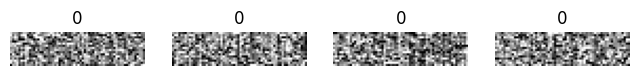

In [24]:

fig = plt.figure(figsize=(8, 4)) # type: ignore

for i in range(4):
    ax = plt.subplot(1, 4, i + 1)
    plt.imshow(images[i],cmap='gray', vmin=0, vmax=255)    
    plt.title(labels[i])
    plt.axis("off")
    

### ▶️ Datensatz aufteilen in Training- und Test-Daten

In [25]:
##############################################################
# Einkommentieren für den Kaggle-Datensatz                   #
# Fixwert 4                                                  #
##############################################################
num_classes = 4


##############################################################
# Einkommentieren für eigene Daten und Ninapro               #
# Bei 8 Sensorwerten  pro Zeile --> (16, 8, 1)               #
# Bei 64 Sensorwerten pro Zeile --> (16, 64, 1)              #
##############################################################
#input_shape = (16, 8, 1)


##############################################################
# Einkommentieren für den Kaggle-Datensatz                   #
# Fix 64 Sensorwerte pro Zeile --> (16, 64, 1)               #
##############################################################
input_shape = (16, 64, 1)


##############################################################
# Aufteilung der Datensätze in Training- und Testdaten       #
# Test-Size --> prozentualer Anteil von Gesamtdaten          #
# Random-State --> Zufallsgrad der Durchmischung             #
##############################################################
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 100) # type: ignore


##############################################################
# Konvertieren auf Wertebereich 0.0 bis 1.0                  #
##############################################################
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255


##############################################################
# Vierte Dimension für Algorithmus hinzufügen                #
##############################################################
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)


##############################################################
# Status der Datensätze ausgeben                             #
##############################################################
print("X_train Vectorform:", X_train.shape)
print("X_test Vectorform:", X_test.shape)
print("y_train Vectorform:", y_train.shape)
print("y_test Vectorform:", y_test.shape)
print()
print(images.shape[0], "Gesamtwerte")
print(X_train.shape[0], "Trainingswerte")
print(X_test.shape[0], "Testwerte")


##############################################################
# Klassenvektor in Matrize konvertieren (One-Hot-Encoding)   #
##############################################################
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train Vectorform: (264, 16, 64, 1)
X_test Vectorform: (114, 16, 64, 1)
y_train Vectorform: (264,)
y_test Vectorform: (114,)

378 Gesamtwerte
264 Trainingswerte
114 Testwerte


#### ▶️ Modellarchitektur in Anlehnung an folgende Publikation :<br>

###### "S-Convnet: A Shallow Convolutional Neural Network Architecture for Neuromuscular Activity Recognition Using Instantaneous High-Density Surface EMG Images"<br>

###### [Link zur Publikation](https://ieeexplore.ieee.org/document/9175266)

📌 Der Ansatz die EMG-Daten in Bilder umzuwandeln wurde diesem Paper entnommen

In [26]:
##############################################################
# Hyperparameter                                             #
##############################################################
batch_size = 32
epochs = 20

initializer='glorot_uniform'
padding='same'

##############################################################
# Modell erstellen                                           #
##############################################################
model = keras.Sequential()
model.add(layers.InputLayer(input_shape))

model.add(layers.Conv2D(64, (4,4), padding = padding, strides=2, input_shape=input_shape, kernel_initializer=initializer))
model.add(layers.Activation('elu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64, (4,4), padding = padding, strides=2))
model.add(layers.Activation('elu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(layers.Activation('elu'))

model.add(layers.Dense(num_classes, activation = 'softmax'))

# Modellparameter ausgeben
model.summary()

c:\Users\Gizmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 8, 32, 64)      │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 8, 32, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 8, 32, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 16, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 2, 8, 64)       │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 2, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 2, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,100 (391.02 KB)

 Trainable params: 100,100 (391.02 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Modell kompilieren
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

# Parameter und Daten an Modell übergeben
# Training durchführen
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,    
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.2169 - loss: 1.4300 - val_accuracy: 0.2642 - val_loss: 1.4365 - learning_rate: 0.0010
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2573 - loss: 1.3928 - val_accuracy: 0.3208 - val_loss: 1.3848 - learning_rate: 0.0010
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2776 - loss: 1.3795 - val_accuracy: 0.2830 - val_loss: 1.3625 - learning_rate: 0.0010
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3794 - loss: 1.3588 - val_accuracy: 0.2264 - val_loss: 1.3900 - learning_rate: 0.0010
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3490 - loss: 1.3496 - val_accuracy: 0.1887 - val_loss: 1.3879 - learning_rate: 0.0010
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4336 - loss: 1.3198 - val_accuracy: 0.3019 - val_loss: 1.3699 - learning_rate: 0.0010
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4085 - loss: 1.2993 - val_accuracy: 0.2830 

### ▶️ Ausgabe der Funktionen für Verlust und Genauigkeit

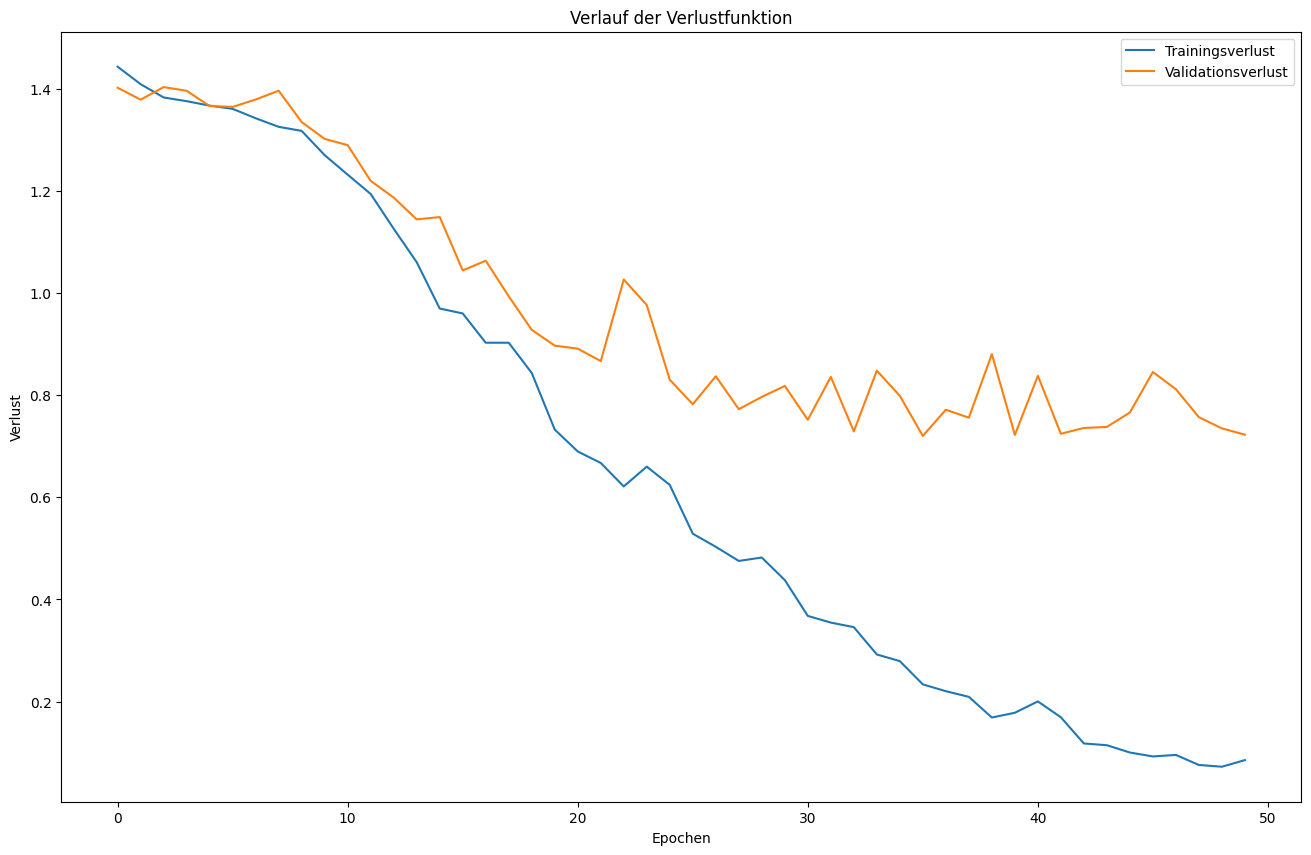

In [10]:
plt.figure(figsize=(16, 10))

plt.plot(range(epochs), history.history['loss'], label="Trainingsverlust")
plt.plot(range(epochs), history.history['val_loss'], label="Validationsverlust")

plt.xlabel("Epochen")
plt.ylabel("Verlust")
plt.legend()
plt.title("Verlauf der Verlustfunktion")

plt.show()

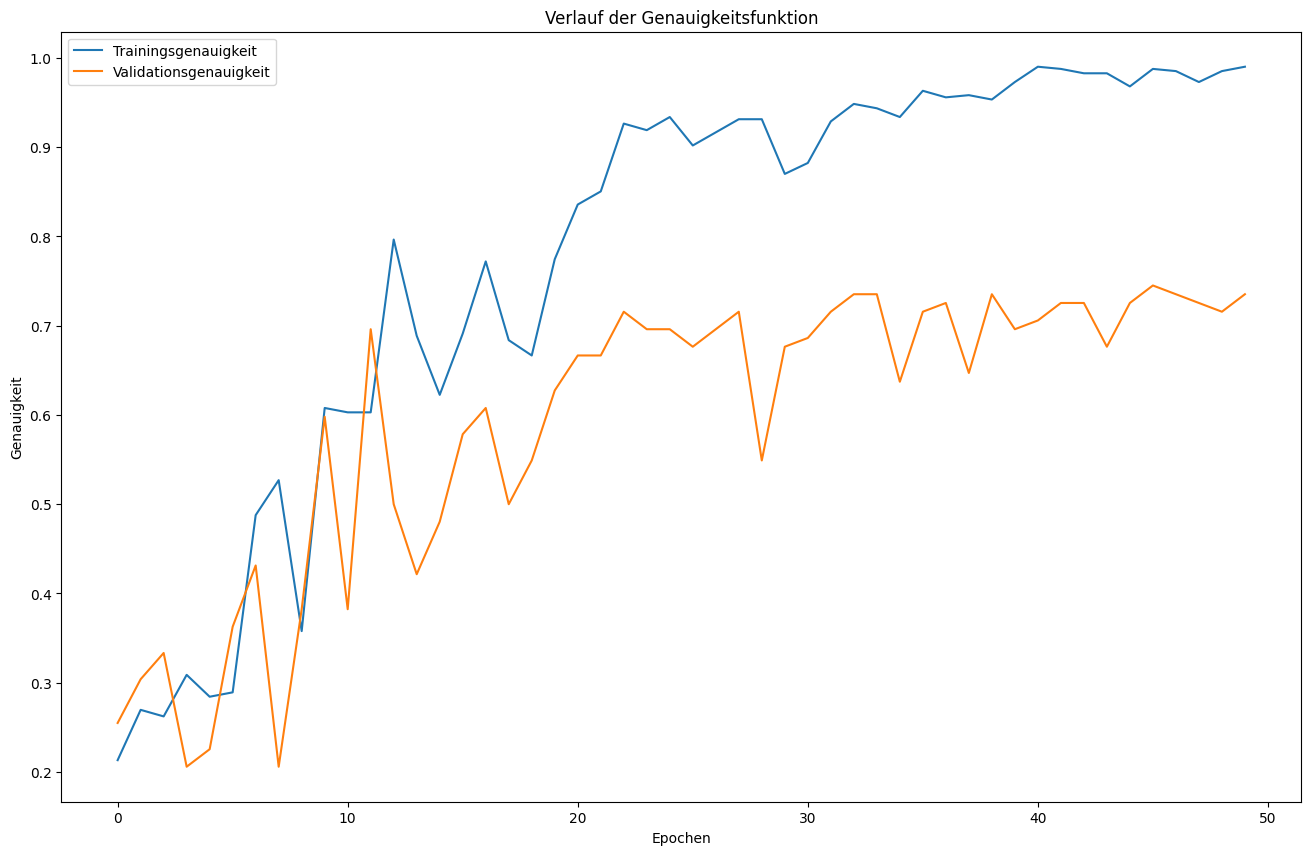

In [167]:
plt.figure(figsize=(16, 10))

plt.plot(range(epochs), history.history['accuracy'], label="Trainingsgenauigkeit")
plt.plot(range(epochs), history.history['val_accuracy'], label="Validationsgenauigkeit")

plt.xlabel("Epochen")
plt.ylabel("Genauigkeit")
plt.legend()
plt.title("Verlauf der Genauigkeitsfunktion")

plt.show()

### ▶️ Scores zur Beurteilung der Modellqualität 

In [11]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Testverlust :", score[0])
print("Testgenauigkeit :", score[1])

Testverlust : 0.791837215423584
Testgenauigkeit : 0.6621004343032837


### ▶️ Metriken zur Beurteilung der Modellqualität 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


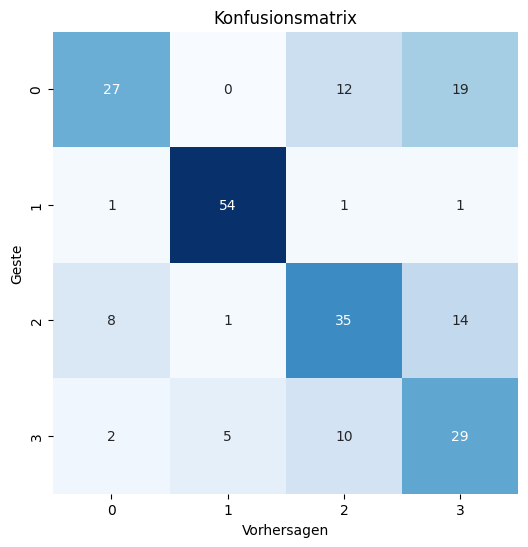

              precision    recall  f1-score   support

           0       0.71      0.47      0.56        58
           1       0.90      0.95      0.92        57
           2       0.60      0.60      0.60        58
           3       0.46      0.63      0.53        46

    accuracy                           0.66       219
   macro avg       0.67      0.66      0.66       219
weighted avg       0.68      0.66      0.66       219



In [12]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(X_test),axis=1)
# 
cm = confusion_matrix(y_test_arg, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Vorhersagen")
plt.ylabel("Geste")
plt.title("Konfusionsmatrix")
plt.show()

print(classification_report(y_test_arg, y_pred))